In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# 2. Load Dataset
df = pd.read_csv('products_all_brands.csv')  # Ganti dengan path dataset
df.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,rating_types_str,average_rating,total_reviews,average_rating_by_types,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist
0,796_3ce,MULTI EYE COLOR PALETTE,97802,130,Rp 555.000 - Rp 687.000,NaN,https://www.sociolla.com/eyeshadow/69460-phan-...,2022-10-03T03:30:06.681Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.920000,5,"""star_long_wear"": 5; ""star_packaging"": 4.8; ""s...",5,0,0,5,717
1,796_3ce,VELVET LIP TINT,97810,50,Rp 264.000,NaN,https://www.sociolla.com/lip-cream/69468-son-k...,2022-10-03T03:02:40.340Z,Lip Cream,Makeup; Lips; Lip Cream,is_star_long_wear;is_star_packaging;is_star_pi...,4.576190,42,"""star_long_wear"": 4.309523809523809; ""star_pac...",42,10,2,30,682
2,796_3ce,LIP COLOR,97822,60,Rp 317.000,NaN,https://www.sociolla.com/lip-matte/69480-son-t...,2023-05-30T09:49:15.158Z,Lipstick,Makeup; Lips; Lipstick,is_star_long_wear;is_star_packaging;is_star_pi...,0.000000,0,NaN,0,0,0,0,173
3,796_3ce,MINI MULTI EYE COLOR PALETTE,97833,80,Rp 423.000,NaN,https://www.sociolla.com/eyeshadow/69491-phan-...,2022-10-03T03:27:01.334Z,Eyeshadow,Makeup; Eyes; Eyeshadow,is_star_long_wear;is_star_packaging;is_star_pi...,4.883333,6,"""star_long_wear"": 4.916666666666667; ""star_pac...",12,1,0,11,257
4,796_3ce,FACE BLUSH,97801,60,Rp 300.000,NaN,https://www.sociolla.com/blush/69459-phan-ma-h...,2022-10-03T03:22:26.610Z,Blush,Makeup; Face; Blush,is_star_long_wear;is_star_packaging;is_star_pi...,4.858824,13,"""star_long_wear"": 4.9411764705882355; ""star_pa...",17,2,0,15,387


In [3]:
# 3. Copy Dataset Asli untuk Backup
df_raw = df.copy()

In [4]:
# Cek Missing Values
print("Jumlah missing values per kolom:\n", df.isnull().sum())

Jumlah missing values per kolom:
 brand_name                         0
product_name                       0
product_id                         0
beauty_point_earned                0
price_range                        0
price_by_combinations           3549
url                                0
active_date                     2102
default_category                   0
categories                         4
rating_types_str                  75
average_rating                     0
total_reviews                      0
average_rating_by_types         1846
total_recommended_count            0
total_repurchase_maybe_count       0
total_repurchase_no_count          0
total_repurchase_yes_count         0
total_in_wishlist                  0
dtype: int64


In [5]:
# Drop missing rows
df = df.dropna()

In [6]:
columns_to_drop = ['product_url', 'description', 'image_link']
df_reduced = df.drop(columns=columns_to_drop, errors='ignore')

In [7]:
# Cek jumlah baris duplikat secara keseluruhan
df.duplicated().sum()

np.int64(0)

In [8]:
# Sebelum pengurangan (tampilkan semua kolom)
print("Kolom sebelum pengurangan:", df.columns.tolist())

# Keep all columns in df_reduced for now
df_reduced = df.copy()

# Setelah pengurangan
print("Kolom setelah pengurangan:", df_reduced.columns.tolist())

Kolom sebelum pengurangan: ['brand_name', 'product_name', 'product_id', 'beauty_point_earned', 'price_range', 'price_by_combinations', 'url', 'active_date', 'default_category', 'categories', 'rating_types_str', 'average_rating', 'total_reviews', 'average_rating_by_types', 'total_recommended_count', 'total_repurchase_maybe_count', 'total_repurchase_no_count', 'total_repurchase_yes_count', 'total_in_wishlist']
Kolom setelah pengurangan: ['brand_name', 'product_name', 'product_id', 'beauty_point_earned', 'price_range', 'price_by_combinations', 'url', 'active_date', 'default_category', 'categories', 'rating_types_str', 'average_rating', 'total_reviews', 'average_rating_by_types', 'total_recommended_count', 'total_repurchase_maybe_count', 'total_repurchase_no_count', 'total_repurchase_yes_count', 'total_in_wishlist']


In [9]:
# Contoh ambil harga pertama dari string "produk:harga;produk:harga;..."
def extract_first_price(s):
    try:
        return float(s.split(';')[0].split(':')[1].replace('"','').strip())
    except:
        return np.nan

df_reduced['price_numeric'] = df_reduced['price_by_combinations'].apply(extract_first_price)

In [10]:
# Standardisasi Format Kolom (huruf kecil & hapus spasi)
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
# Cek hasil filter
print("Jumlah data skincare:", df.shape[0])

Jumlah data skincare: 2738


In [11]:
numerical_cols = ['price_numeric', 'average_rating', 'total_reviews']
X = df_reduced[numerical_cols].dropna()
idx = X.index

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Cek dan pecah kolom 'categories' jika ada
if 'categories' in df.columns:
    split_kat = df['categories'].astype(str).str.split(';', expand=True)
    for i in range(split_kat.shape[1]):
        df[f'category_{i+1}'] = split_kat[i]

# Lanjutkan hanya jika 'category_1' sudah berhasil dibuat
if 'category_1' in df.columns:
    df['kategori_label'] = df['category_1'].factorize()[0]
    df['kategori_label'] = df['kategori_label'].apply(lambda x: x if x < 3 else 3)
else:
    print("Kolom category_1 belum tersedia.")

In [13]:
# Convert 'Rp 120.000' → 120000 (numerik)
df['price'] = df['price_range'].str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [14]:
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans_final.fit(X_scaled)

labels = kmeans_final.labels_
df_reduced.loc[idx, 'cluster'] = labels

In [15]:
# Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Simpan hasil cluster
df = df.loc[X.index]
df['cluster'] = kmeans.labels_

In [16]:
print(df.columns.tolist())

['brand_name', 'product_name', 'product_id', 'beauty_point_earned', 'price_range', 'price_by_combinations', 'url', 'active_date', 'default_category', 'categories', 'rating_types_str', 'average_rating', 'total_reviews', 'average_rating_by_types', 'total_recommended_count', 'total_repurchase_maybe_count', 'total_repurchase_no_count', 'total_repurchase_yes_count', 'total_in_wishlist', 'category_1', 'category_2', 'category_3', 'kategori_label', 'price', 'cluster']


In [17]:
desired_cols = ['brand_name', 'product_name', 'price', 'average_rating', 'total_reviews', 'cluster']
available_cols = [col for col in desired_cols if col in df.columns]

df[available_cols].head()

,brand_name,product_name,price,average_rating,total_reviews,cluster
19,796_3ce,TATTOO LIP TINT,229000.0,5.000000,2,1
27,751_abib,Quick Sunstick Protection Bar,400000.0,4.666667,17,4
31,751_abib,Heartleaf Sun Essence Calming Drop,390000.0,4.843750,6,4
32,751_abib,Gummy Sheet Mask Milk Sticker,56000.0,4.916667,5,1
33,751_abib,Jericho Rose Creme Nutrition Tube,490000.0,5.000000,1,4


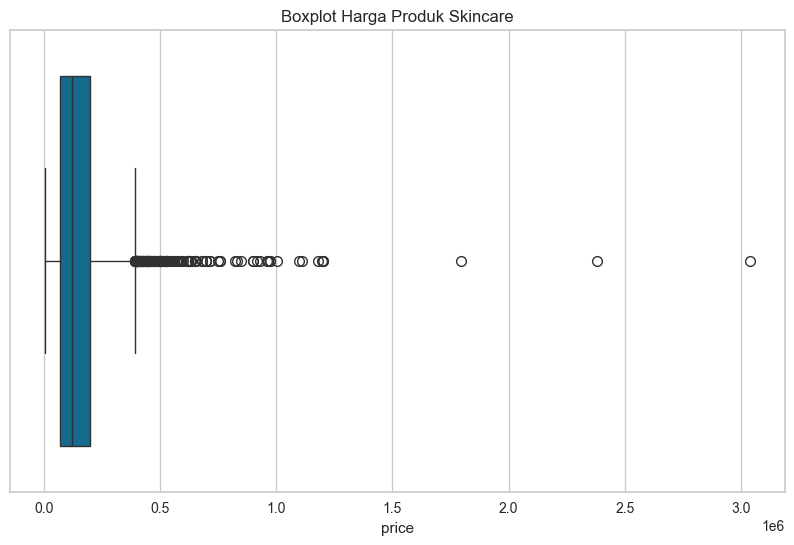

In [18]:
# EDA awal: lihat distribusi harga
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title("Boxplot Harga Produk Skincare")
plt.show()

# 2. Bersihkan outlier dengan metode IQR
Q1, Q3 = df['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

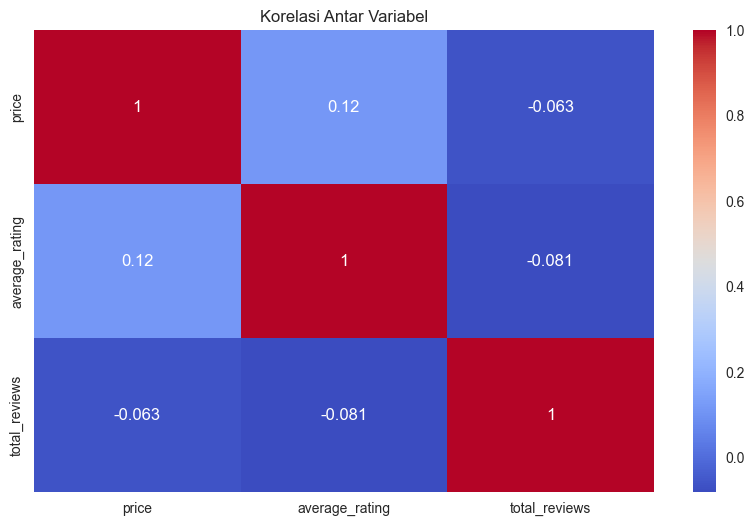

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['price', 'average_rating', 'total_reviews']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

In [20]:
print(df.describe())

          product_id  beauty_point_earned  average_rating  total_reviews  \
count    2228.000000          2228.000000     2228.000000    2228.000000   
mean    82028.491472            21.036804        4.635042     337.367594   
std     27537.835410            17.884339        0.244877    1122.764281   
min       151.000000             0.000000        1.200000       0.000000   
25%     75399.250000            10.000000        4.526516       8.000000   
50%     92672.000000            20.000000        4.640867      41.000000   
75%    100074.250000            30.000000        4.758172     193.250000   
max    107813.000000            70.000000        5.000000   18617.000000   

       total_recommended_count  total_repurchase_maybe_count  \
count              2228.000000                   2228.000000   
mean                317.998654                     68.118492   
std                1050.668786                    240.309468   
min                   0.000000                      0.00000

In [21]:
# Pilih kolom numerik yang akan di-cluster
data_cluster = df[['price', 'average_rating', 'total_reviews']].copy()

In [22]:
numerical_cols = [
    'product_id', 'beauty_point_earned', 'average_rating', 'total_reviews',
    'total_recommended_count', 'total_repurchase_maybe_count',
    'total_repurchase_no_count', 'total_repurchase_yes_count',
    'total_in_wishlist', 'price'
]

# Pastikan semua kolom numerik tidak kosong dan bertipe angka
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=numerical_cols)

# Scaling menggunakan StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numerical_cols])

# Hasilnya jadi DataFrame baru
scaled_skincare_df = pd.DataFrame(scaled_array, columns=numerical_cols)

In [23]:
scaled_skincare_df.head()

,product_id,beauty_point_earned,average_rating,total_reviews,total_recommended_count,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,price
0,0.748720,1.060562,1.490708,-0.298765,-0.296067,-0.283525,-0.218394,-0.296065,-0.333423,1.090830
1,0.358370,2.738384,0.852488,-0.295202,-0.295115,-0.283525,-0.218394,-0.294812,-0.307980,2.910578
2,0.332908,-0.617260,1.150324,-0.296093,-0.297019,-0.283525,-0.218394,-0.297318,-0.291270,-0.864552
3,0.332944,-0.617260,0.783757,-0.290747,-0.291307,-0.279363,-0.209701,-0.291052,-0.275700,-0.864552
4,0.333162,-0.617260,-0.041019,-0.288075,-0.288451,-0.271038,-0.218394,-0.288546,-0.263168,-0.864552


In [24]:
selected_cols = [
    'brand_name',
    'beauty_point_earned',
    'average_rating',
    'total_reviews',
    'total_recommended_count',
    'total_in_wishlist',
    'price'
]

# Pastikan semua kolom itu ada di DataFrame kamu
selected_cols = [col for col in selected_cols if col in df.columns]

# Tampilkan data yang hanya mencakup kolom tersebut
df_selected = df[selected_cols]
print(df_selected.head())

   brand_name  beauty_point_earned  average_rating  total_reviews  \
19    796_3ce                   40        5.000000              2   
31   751_abib                   70        4.843750              6   
32   751_abib                   10        4.916667              5   
37   751_abib                   10        4.826923             11   
38   751_abib                   10        4.625000             14   

    total_recommended_count  total_in_wishlist     price  
19                        7                148  229000.0  
31                        8                215  390000.0  
32                        6                259   56000.0  
37                       12                300   56000.0  
38                       15                333   56000.0  


In [25]:
# Lanjut dari scaled_skincare_df yang sudah distandarisasi
pca = PCA(n_components=3)  # Misal ambil 3 komponen utama
pca_result = pca.fit_transform(scaled_skincare_df)
# Ubah jadi DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
# Tampilkan statistik ringkas
pca_df.describe()

,PC1,PC2,PC3
count,2.228000e+03,2.228000e+03,2.228000e+03
mean,4.145896e-17,1.275660e-17,1.594575e-18
std,2.329081e+00,1.421434e+00,1.060350e+00
min,-1.120690e+00,-2.700694e+00,-1.139522e+01
25%,-8.072627e-01,-1.004469e+00,-4.820726e-01
50%,-6.129406e-01,-2.104300e-01,1.398817e-01
75%,-1.376801e-01,7.235659e-01,6.700437e-01
max,3.997999e+01,4.060797e+00,5.194082e+00


In [26]:
pca_df = pca_df.dropna(subset=['PC1', 'PC2', 'PC3'])

In [27]:
# Normalisasi fitur PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df[['PC1', 'PC2', 'PC3']])

# Tentukan jumlah cluster sesuai distribusi (misal 4)
k_optimal = 4

#  Inisialisasi dan fit K-Means dengan n_init untuk mengurangi cluster kosong
kmeans = KMeans(n_clusters=k_optimal, n_init=20, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan label cluster ke dataframe
pca_df['cluster'] = kmeans.labels_
#  Cek jumlah data per cluster
print(pca_df['cluster'].value_counts())

cluster
1    1382
0     402
3     401
2      43
Name: count, dtype: int64


In [28]:
for i in pca_df['cluster'].unique():
    print(f"Cluster {i}:")
    print(pca_df[pca_df['cluster'] == i].head(3))  # tampilkan 3 baris contoh per cluster
    print("\n")

Cluster 0:
        PC1       PC2       PC3  cluster
0 -0.996055  1.619678  1.348532        0
1 -0.966452  3.994125  0.400598        0
5 -0.816410  1.591611  0.725955        0


Cluster 1:
        PC1       PC2       PC3  cluster
2 -0.764943 -0.923653  1.086606        1
3 -0.725676 -0.973483  0.792193        1
4 -0.668593 -1.087515  0.124466        1


Cluster 3:
         PC1       PC2       PC3  cluster
12  2.476694  0.892065 -0.804239        3
63  1.581923 -1.371251 -1.052390        3
64  0.077405 -0.963314 -1.880098        3


Cluster 2:
           PC1       PC2       PC3  cluster
81   16.254326  0.113897  4.358084        2
123   6.723858 -0.459909  1.682177        2
221  17.874788  0.471425  0.947145        2




In [29]:
from scipy.spatial.distance import cdist
import pandas as pd

# Ambil hanya kolom PC1, PC2, PC3
X = pca_df[['PC1','PC2','PC3']].values

# Ambil centroid dari model KMeans yang sama
centroids = kmeans.cluster_centers_  # pastikan ini sama KMeans yang fit ke X di atas

# Hitung jarak
distances = cdist(X, centroids, metric='euclidean')

# Buat DataFrame jarak
distance_df = pd.DataFrame(distances, columns=[f'Cluster_{i}_distance' for i in range(centroids.shape[0])])
distance_df['Assigned_Cluster'] = kmeans.labels_

print(distance_df.head())

   Cluster_0_distance  Cluster_1_distance  Cluster_2_distance  \
0            1.609761            2.378814            6.693193   
1            2.477296            4.464566            7.518431   
2            2.898197            1.050549            6.420758   
3            2.835028            0.891788            6.389447   
4            2.814782            0.894738            6.402072   

   Cluster_3_distance  Assigned_Cluster  
0            3.591870                 0  
1            4.840709                 0  
2            2.742625                 1  
3            2.473915                 1  
4            1.915303                 1  


In [30]:
# Menentukan cluster terdekat berdasarkan jarak ke centroid
pca_df['Assigned_Cluster'] = distances.argmin(axis=1)
# Menampilkan 5 data pertama dengan cluster yang dialokasikan
print(pca_df[['PC1','PC2','PC3','Assigned_Cluster']].head())

        PC1       PC2       PC3  Assigned_Cluster
0 -0.996055  1.619678  1.348532                 0
1 -0.966452  3.994125  0.400598                 0
2 -0.764943 -0.923653  1.086606                 1
3 -0.725676 -0.973483  0.792193                 1
4 -0.668593 -1.087515  0.124466                 1


In [31]:
# Hitung centroid baru berdasarkan Assigned_Cluster
updated_centroids = pca_df.groupby('Assigned_Cluster')[['PC1', 'PC2', 'PC3']].mean()
print(updated_centroids)

                       PC1       PC2       PC3
Assigned_Cluster                              
0                -0.532941  2.004161 -0.023126
1                -0.482779 -0.692693  0.431587
2                 8.425167  0.266839  0.415623
3                 0.306633 -0.576565 -1.524658


In [32]:
X = pca_df[['PC1', 'PC2', 'PC3']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans.fit(X_scaled)
pca_df['cluster'] = kmeans.labels_

In [34]:
# Pilih kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns]

In [35]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [36]:
# Buat dataframe PCA dengan index yang sinkron
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df = pca_df.reset_index(drop=True)
df_brand = df.reset_index(drop=True)

In [37]:
# Fitting K-Means
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans_final.fit(X_scaled)

# Label cluster
df['cluster'] = kmeans_final.labels_

# Centroid (opsional)
centroids = kmeans_final.cluster_centers_

In [38]:
pca_df['cluster'] = kmeans.labels_

In [39]:
# Misal fitur PCA atau fitur asli
X_eval = pca_df[['PC1', 'PC2']]  # kalau pakai PCA 2D
clusters_eval = pca_df['cluster']

score = silhouette_score(X_eval, clusters_eval)
print("Silhouette Score:", score)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette Score: 0.47381098782208786
Inertia: 3791.6214400732592


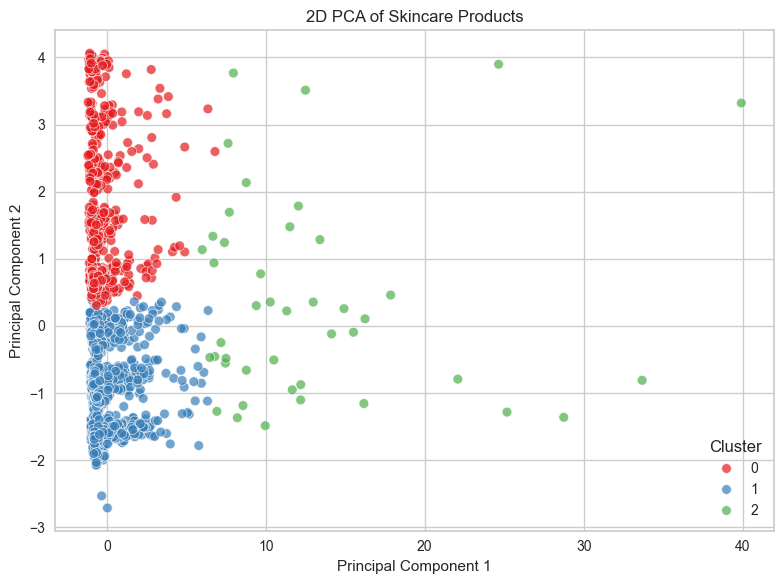

In [40]:
# Plot PCA 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    data=pca_df,
    palette='Set1',
    alpha=0.7
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Skincare Products')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


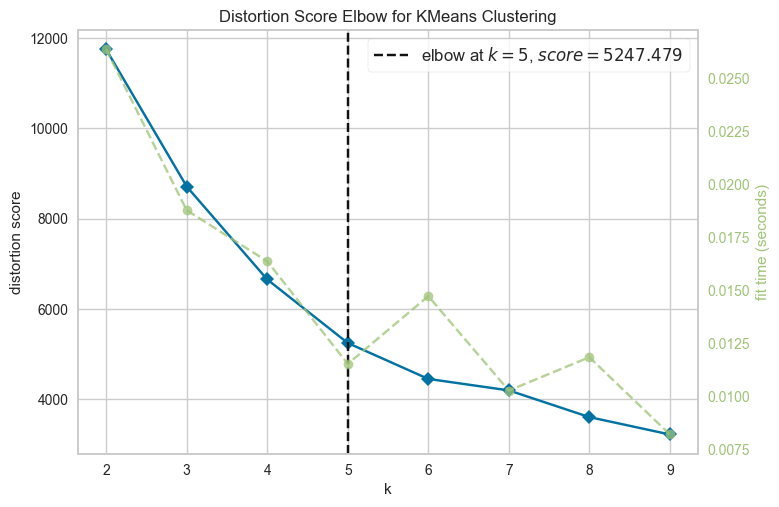

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Inisialisasi model KMeans tanpa jumlah cluster
kmeans = KMeans(random_state=42)

# KElbowVisualizer untuk memvisualisasikan distortion dari k=2 sampai k=10
elbow = KElbowVisualizer(kmeans, k=(2,10), timings=True)
elbow.fit(pca_df[['PC1', 'PC2', 'PC3']])  # gunakan hasil PCA (PC1, PC2, PC3)
elbow.show()

In [42]:
# Jalankan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

In [43]:
# Tambahkan hasil cluster ke pca_df
pca_df['cluster'] = clusters

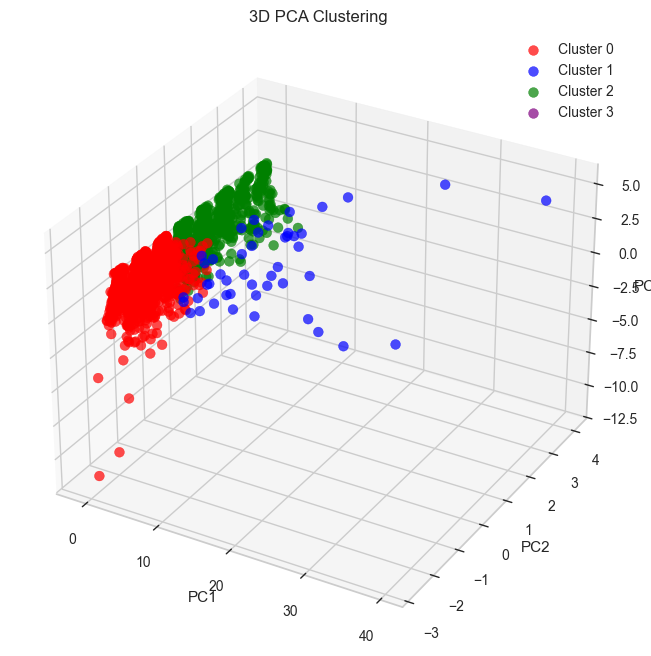

In [44]:
# Plot 3D PCA dengan warna per cluster
colors = ['red', 'blue', 'green', 'purple']  # Sesuaikan jumlah cluster
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colors):
    cluster_data = pca_df[pca_df['cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               c=color, label=f'Cluster {i}', s=50, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Clustering')
plt.legend()
plt.show()

In [45]:
# Tampilkan
df.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,category_1,category_2,category_3,kategori_label,price,cluster
19,796_3ce,TATTOO LIP TINT,102642,40,Rp 229.000,"""#CANDY JELLY"": 229000; ""#LUZTIC"": 229000; ""#Y...",https://www.sociolla.com/lip-tint/74300-tattoo...,2023-03-13T04:04:51.181Z,Lip Tint,Makeup; Lips; Lip Tint,...,0,0,7,148,Makeup,Lips,Lip Tint,0,229000.0,0
31,751_abib,Heartleaf Sun Essence Calming Drop,91895,70,Rp 390.000,"""50ml"": 390000",https://www.sociolla.com/essence/63553-heartle...,2023-10-04T11:29:23.435Z,Essence,Skincare; Treatment; Essence,...,0,0,8,215,Skincare,Treatment,Essence,1,390000.0,0
32,751_abib,Gummy Sheet Mask Milk Sticker,91194,10,Rp 56.000,"""30ml"": 56000",https://www.sociolla.com/sheet-mask/62852-gumm...,2023-08-11T07:48:24.187Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,0,0,6,259,Skincare,Face Mask,Sheet Mask,1,56000.0,2
37,751_abib,Gummy Sheet Mask Heartleaf Sticker,91195,10,Rp 56.000,"""27ml"": 56000",https://www.sociolla.com/sheet-mask/62853-gumm...,2023-08-11T04:11:05.190Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,1,1,11,300,Skincare,Face Mask,Sheet Mask,1,56000.0,2
38,751_abib,Mild Acidic pH sheet Mask Heartleaf Fit,91201,10,Rp 56.000,"""30ml"": 56000",https://www.sociolla.com/sheet-mask/62859-mild...,2023-08-11T08:13:12.551Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,3,0,13,333,Skincare,Face Mask,Sheet Mask,1,56000.0,2


In [46]:
# Pisahkan kategori berdasarkan ';' dan buat tiga kolom
df[['category_1', 'category_2', 'category_3']] = df['categories'].str.split(';', expand=True)
df.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,category_1,category_2,category_3,kategori_label,price,cluster
19,796_3ce,TATTOO LIP TINT,102642,40,Rp 229.000,"""#CANDY JELLY"": 229000; ""#LUZTIC"": 229000; ""#Y...",https://www.sociolla.com/lip-tint/74300-tattoo...,2023-03-13T04:04:51.181Z,Lip Tint,Makeup; Lips; Lip Tint,...,0,0,7,148,Makeup,Lips,Lip Tint,0,229000.0,0
31,751_abib,Heartleaf Sun Essence Calming Drop,91895,70,Rp 390.000,"""50ml"": 390000",https://www.sociolla.com/essence/63553-heartle...,2023-10-04T11:29:23.435Z,Essence,Skincare; Treatment; Essence,...,0,0,8,215,Skincare,Treatment,Essence,1,390000.0,0
32,751_abib,Gummy Sheet Mask Milk Sticker,91194,10,Rp 56.000,"""30ml"": 56000",https://www.sociolla.com/sheet-mask/62852-gumm...,2023-08-11T07:48:24.187Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,0,0,6,259,Skincare,Face Mask,Sheet Mask,1,56000.0,2
37,751_abib,Gummy Sheet Mask Heartleaf Sticker,91195,10,Rp 56.000,"""27ml"": 56000",https://www.sociolla.com/sheet-mask/62853-gumm...,2023-08-11T04:11:05.190Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,1,1,11,300,Skincare,Face Mask,Sheet Mask,1,56000.0,2
38,751_abib,Mild Acidic pH sheet Mask Heartleaf Fit,91201,10,Rp 56.000,"""30ml"": 56000",https://www.sociolla.com/sheet-mask/62859-mild...,2023-08-11T08:13:12.551Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,3,0,13,333,Skincare,Face Mask,Sheet Mask,1,56000.0,2


In [47]:
print(df.head())
print(df.columns)

   brand_name                             product_name  product_id  \
19    796_3ce                          TATTOO LIP TINT      102642   
31   751_abib       Heartleaf Sun Essence Calming Drop       91895   
32   751_abib            Gummy Sheet Mask Milk Sticker       91194   
37   751_abib       Gummy Sheet Mask Heartleaf Sticker       91195   
38   751_abib  Mild Acidic pH sheet Mask Heartleaf Fit       91201   

    beauty_point_earned price_range  \
19                   40  Rp 229.000   
31                   70  Rp 390.000   
32                   10   Rp 56.000   
37                   10   Rp 56.000   
38                   10   Rp 56.000   

                                price_by_combinations  \
19  "#CANDY JELLY": 229000; "#LUZTIC": 229000; "#Y...   
31                                     "50ml": 390000   
32                                      "30ml": 56000   
37                                      "27ml": 56000   
38                                      "30ml": 56000   

 

Mengetahui banyak brand setiap cluster

In [48]:
# Pisahkan per cluster dari DataFrame utama
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\827624253.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(data=filtered_df, x="brand_name", palette=pal, order=top_brands)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\827624253.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=45, ha='right')


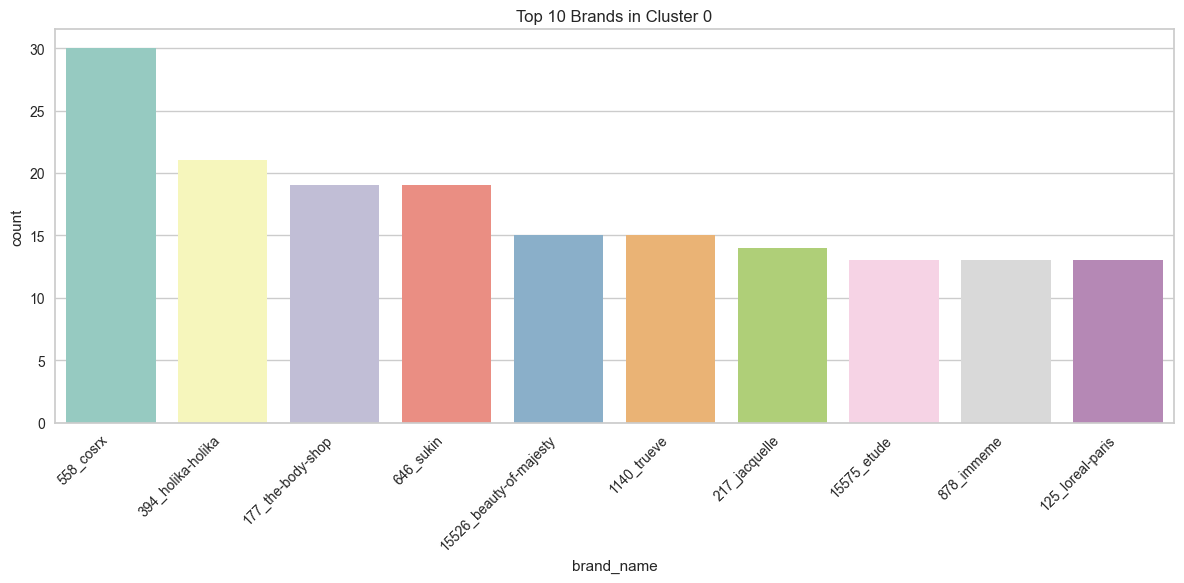

In [49]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_0["brand_name"].value_counts().nlargest(10).index
filtered_df = cluster_0[cluster_0["brand_name"].isin(top_brands)]


filtered_df.columns = filtered_df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace(';','')
plt.figure(figsize=(12,6))

# Palette untuk 10 brand
pal = sns.color_palette("Set3", 10)

# Countplot
pl = sns.countplot(data=filtered_df, x="brand_name", palette=pal, order=top_brands)
pl.set_title("Top 10 Brands in Cluster 0")
pl.set_xticklabels(pl.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3072144823.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3072144823.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3072144823.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


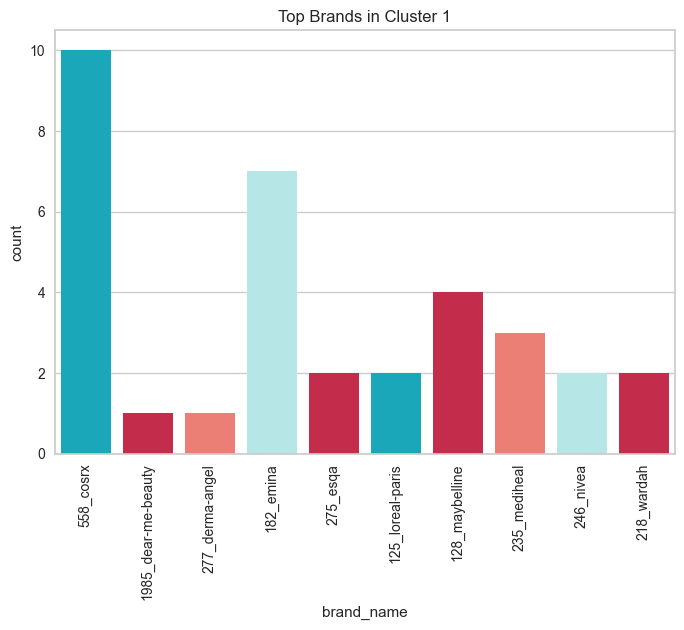

In [50]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_1["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_1[cluster_1["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Top Brands in Cluster 1")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1457676559.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1457676559.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1457676559.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


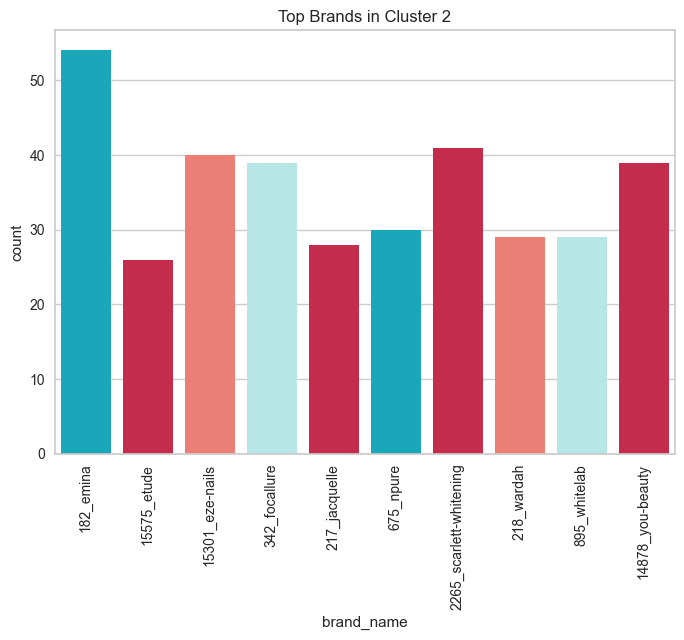

In [51]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_2["brand_name"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_2[cluster_2["brand_name"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["brand_name"], palette=pal)
pl.set_title("Top Brands in Cluster 2")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

Harga Rata-rata Berdasarkan Cluster

In [52]:
# Hitung rata-rata harga per cluster
cluster_means = df.groupby('cluster')['price'].mean().to_dict()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\2078434012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='price', palette='PuRd')


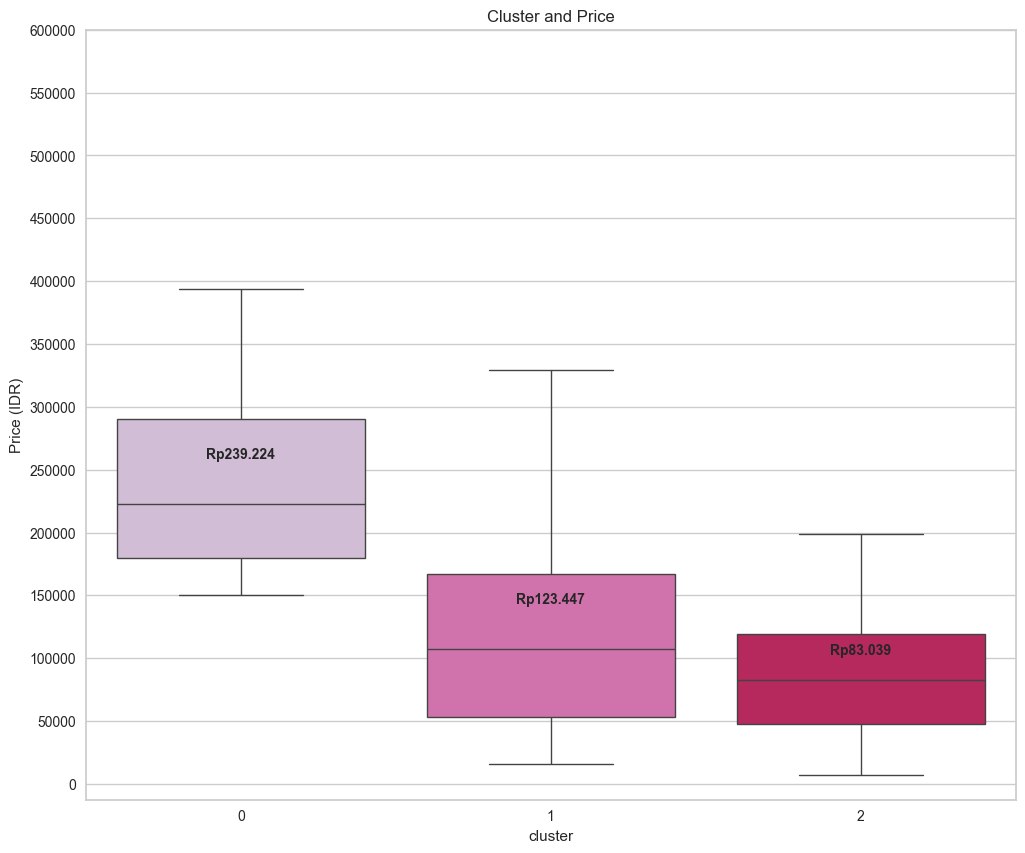

In [53]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='cluster', y='price', palette='PuRd')

y_ticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]  # Adjust the ticks based on your actual data
plt.yticks(y_ticks, [f'{val:.0f}' for val in y_ticks])
for i, mean in cluster_means.items():
    plt.text(i, mean + 20000, f"Rp{int(mean):,}".replace(',', '.'),
             ha='center', fontsize=10, fontweight='bold')
# Set the title
plt.title("Cluster and Price")
plt.ylabel('Price (IDR)')
# Show the plot
plt.show()

Plot Sebar Berbasis Klaster Daftar Keinginan dan Titik Kecantikan

In [54]:
df.head()

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,category_1,category_2,category_3,kategori_label,price,cluster
19,796_3ce,TATTOO LIP TINT,102642,40,Rp 229.000,"""#CANDY JELLY"": 229000; ""#LUZTIC"": 229000; ""#Y...",https://www.sociolla.com/lip-tint/74300-tattoo...,2023-03-13T04:04:51.181Z,Lip Tint,Makeup; Lips; Lip Tint,...,0,0,7,148,Makeup,Lips,Lip Tint,0,229000.0,0
31,751_abib,Heartleaf Sun Essence Calming Drop,91895,70,Rp 390.000,"""50ml"": 390000",https://www.sociolla.com/essence/63553-heartle...,2023-10-04T11:29:23.435Z,Essence,Skincare; Treatment; Essence,...,0,0,8,215,Skincare,Treatment,Essence,1,390000.0,0
32,751_abib,Gummy Sheet Mask Milk Sticker,91194,10,Rp 56.000,"""30ml"": 56000",https://www.sociolla.com/sheet-mask/62852-gumm...,2023-08-11T07:48:24.187Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,0,0,6,259,Skincare,Face Mask,Sheet Mask,1,56000.0,2
37,751_abib,Gummy Sheet Mask Heartleaf Sticker,91195,10,Rp 56.000,"""27ml"": 56000",https://www.sociolla.com/sheet-mask/62853-gumm...,2023-08-11T04:11:05.190Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,1,1,11,300,Skincare,Face Mask,Sheet Mask,1,56000.0,2
38,751_abib,Mild Acidic pH sheet Mask Heartleaf Fit,91201,10,Rp 56.000,"""30ml"": 56000",https://www.sociolla.com/sheet-mask/62859-mild...,2023-08-11T08:13:12.551Z,Sheet Mask,Skincare; Face Mask; Sheet Mask,...,3,0,13,333,Skincare,Face Mask,Sheet Mask,1,56000.0,2


C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3827272548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='average_rating', palette='coolwarm')


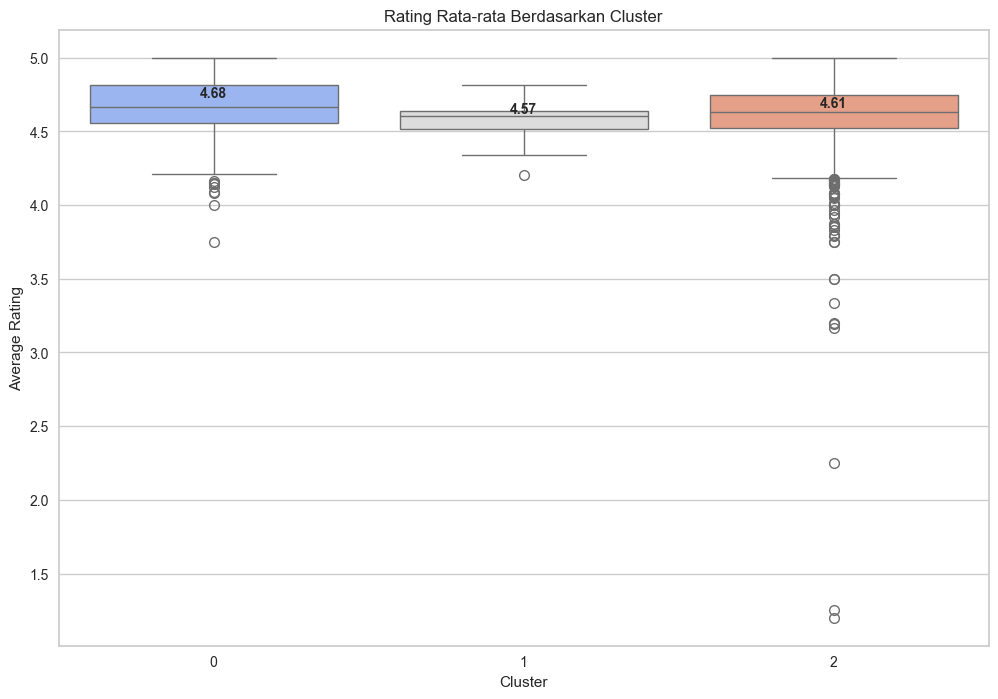

In [55]:
# Hitung rata-rata rating per cluster
cluster_rating_means = df.groupby('cluster')['average_rating'].mean()

# Visualisasi Rating rata-rata per cluster
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='cluster', y='average_rating', palette='coolwarm')

# Tambahkan nilai rata-rata di atas box
for i, mean in cluster_rating_means.items():
    plt.text(i, mean + 0.05, f"{mean:.2f}",
             ha='center', fontsize=10, fontweight='bold')

# Set judul dan label
plt.title("Rating Rata-rata Berdasarkan Cluster")
plt.ylabel('Average Rating')
plt.xlabel('Cluster')

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1467126977.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x='total_in_wishlist', y='total_reviews', hue='cluster', data=df, palette=pal, s=100)


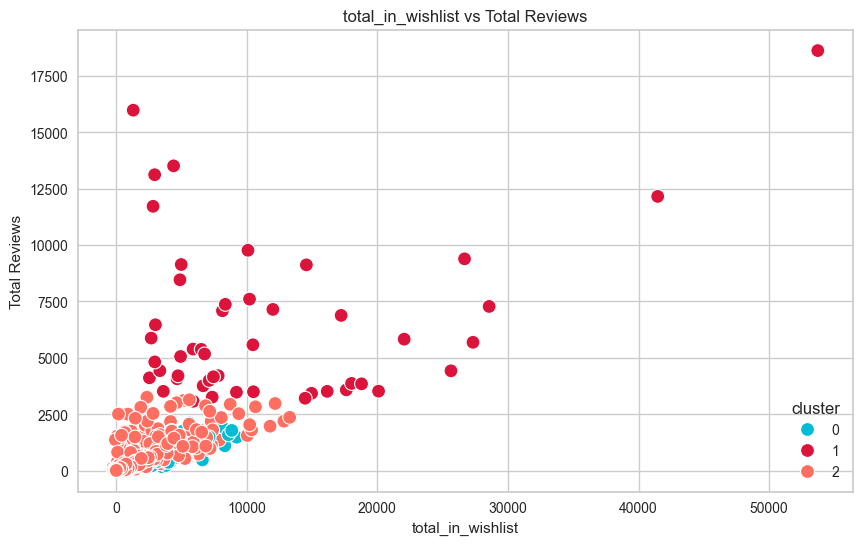

In [56]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_in_wishlist', y='total_reviews', hue='cluster', data=df, palette=pal, s=100)

# Add labels and title
plt.xlabel('total_in_wishlist')
plt.ylabel('Total Reviews')
plt.title('total_in_wishlist vs Total Reviews')

# Show the plot
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3693158495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='total_reviews', palette='viridis')


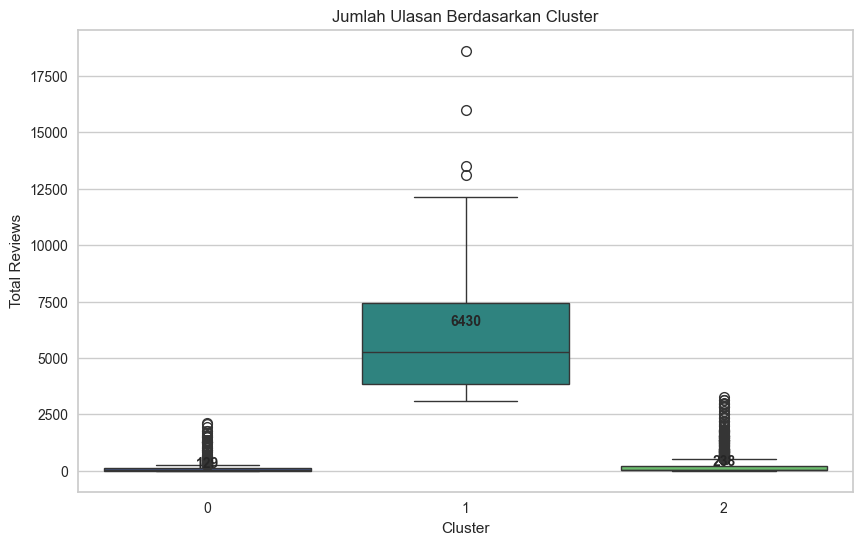

In [57]:
# Visualisasi jumlah ulasan (total_reviews) berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='total_reviews', palette='viridis')

# Hitung rata-rata ulasan per cluster
review_means = df.groupby('cluster')['total_reviews'].mean()

# Tambahkan label rata-rata di atas boxplot
for i, mean in review_means.items():
    plt.text(i, mean + 5, f"{mean:.0f}", ha='center', fontsize=10, fontweight='bold')

plt.title("Jumlah Ulasan Berdasarkan Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Reviews")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\2816274365.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\2816274365.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\2816274365.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


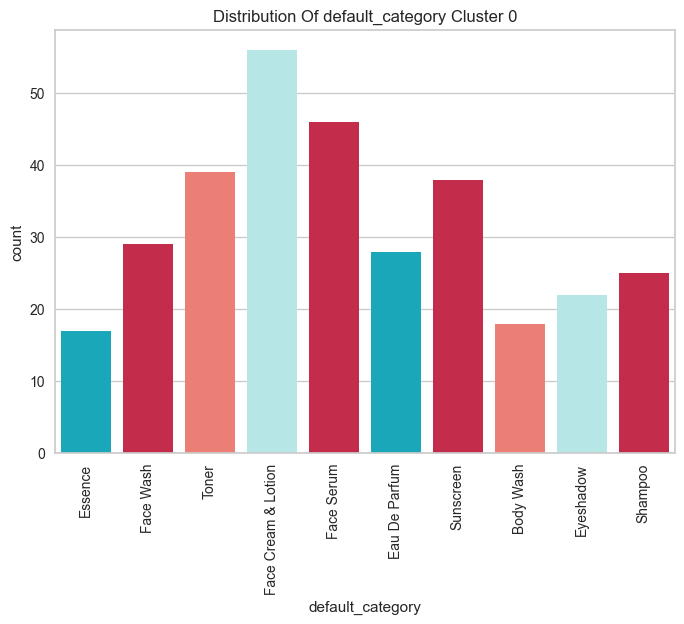

In [58]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_0["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_0[cluster_0["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 0")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3973260687.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3973260687.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3973260687.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


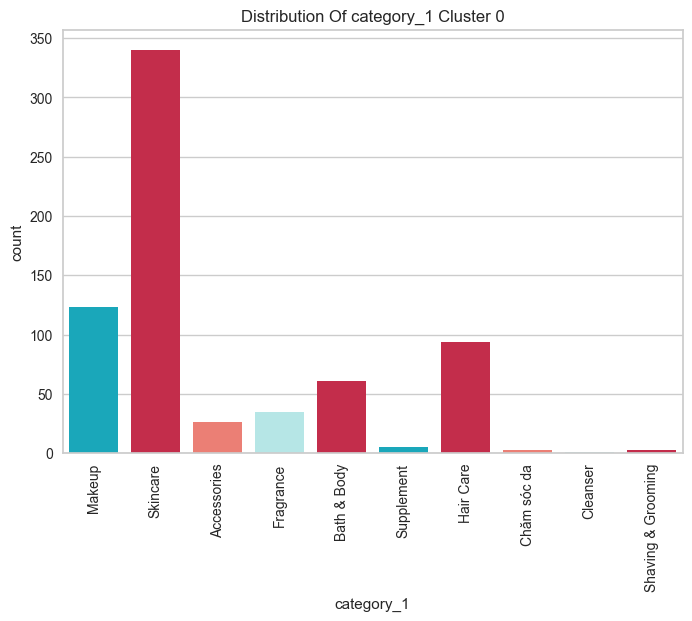

In [59]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_0["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_0[cluster_0["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 0")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\465768972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\465768972.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\465768972.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


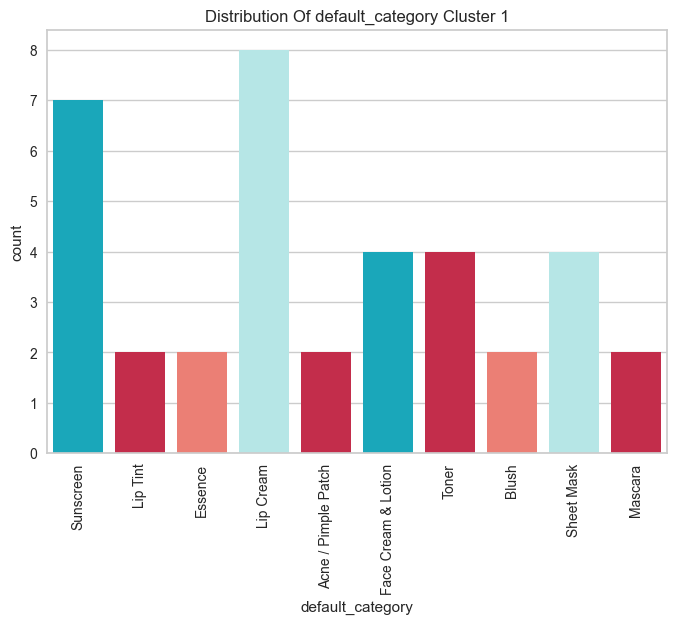

In [60]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_1["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_1[cluster_1["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 1")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3552819381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3552819381.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


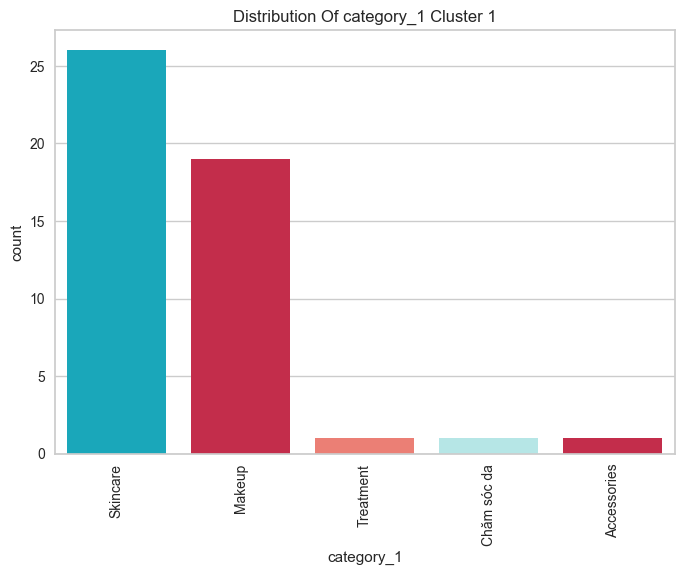

In [61]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_1["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_1[cluster_1["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 1")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3827545752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3827545752.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\3827545752.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


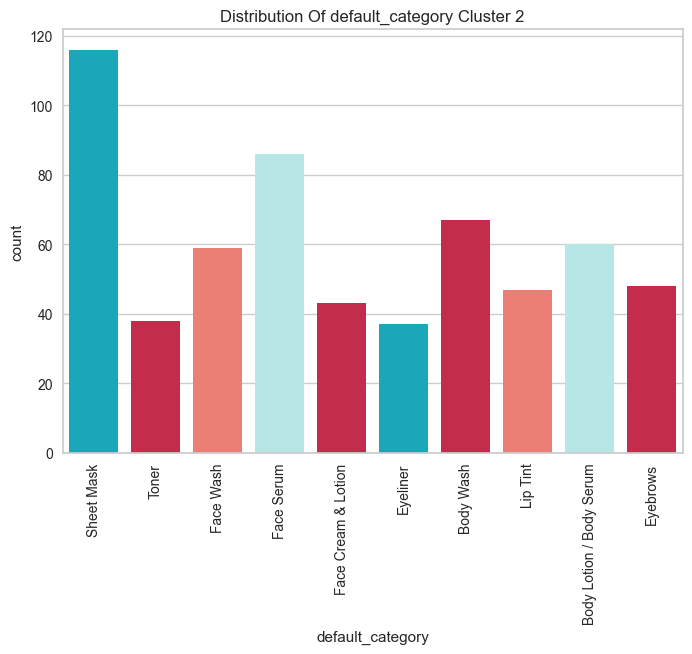

In [62]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_2["default_category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_2[cluster_2["default_category"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["default_category"], palette=pal)
pl.set_title("Distribution Of default_category Cluster 2")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1301647873.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1301647873.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
C:\Users\ACER\AppData\Local\Temp\ipykernel_8060\1301647873.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')


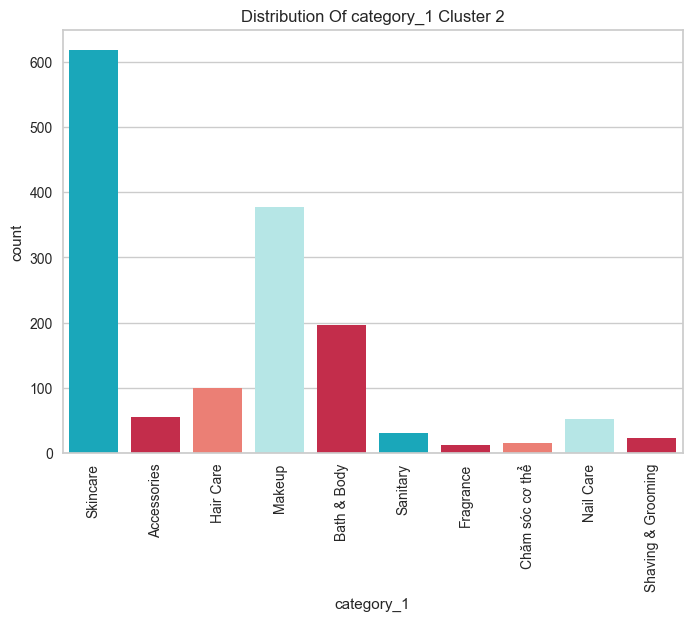

In [63]:
pal = ["#00BCD4", "#DC143C", "#FF6F61", "#AEEEEE", "#DC143C"]
top_brands = cluster_2["category_1"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 brands
filtered_df = cluster_2[cluster_2["category_1"].isin(top_brands)]

# Create a countplot for the top 10 brands
pl = sns.countplot(x=filtered_df["category_1"], palette=pal)
pl.set_title("Distribution Of category_1 Cluster 2")
pl.set_xticklabels(pl.get_xticklabels(), rotation=90, ha='center')
plt.show()

Brand-specific market analysis

In [64]:
df_product_rearranged = df.sort_values(by='beauty_point_earned', ascending=False).reset_index(drop=True)

# Output the 10 maximum values in the 'beauty_point' column
df_product_rearranged.head(10)

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,category_1,category_2,category_3,kategori_label,price,cluster
0,584_aeris-beaute,Onyx 15 Face & Eye Brush Set,34594,70,Rp 379.000,"""Set of 15"": 379000",https://www.sociolla.com/brush-set/12018-onyx-...,2023-10-12T05:39:41.261Z,Brush Set,Accessories; Makeup Brushes; Brush Set,...,19,4,27,40,Accessories,Makeup Brushes,Brush Set,2,379000.0,0
1,183_nuxe,Aquabella Beauty Revealer Lotion Essence,35560,70,Rp 350.000,"""200 ml"": 350000",https://www.sociolla.com/face-cream-lotion/137...,2023-05-17T10:59:35.659Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,3,3,8,48,Skincare,Moisturizer,Face Cream & Lotion,1,350000.0,0
2,15575_etude,Moistfull Collagen - Eye Cream,101802,70,Rp 363.000,"""28 ml"": 363000",https://www.sociolla.com/default-category/7346...,2023-02-27T07:36:35.880Z,Eye Cream,Skincare; Eye Care; Eye Cream,...,0,0,2,109,Skincare,Eye Care,Eye Cream,1,363000.0,0
3,15575_etude,Power Eyelash Ampoule,101389,70,Rp 374.000,"""6 gr"": 374000",https://www.sociolla.com/eye-serum/73047-power...,2023-02-02T06:46:21.252Z,Eye Serum,Skincare; Eye Care; Eye Serum,...,0,0,2,26,Skincare,Eye Care,Eye Serum,1,374000.0,0
4,15575_etude,Double Lasting Foundation,99815,70,Rp 376.000,""" 17N1 Natural Vanilla"": 376000; ""23C1 Rosy Sa...",https://www.sociolla.com/foundation/71473-doub...,2022-12-15T09:06:23.554Z,Foundation,Makeup; Face; Foundation,...,0,0,12,384,Makeup,Face,Foundation,0,376000.0,0
5,15575_etude,Soon Jung Cica Relief Toner Pad,101825,70,Rp 375.000,"""130 ml"": 375000",https://www.sociolla.com/toner/73483-soon-jung...,2023-03-20T10:12:37.683Z,Toner,Skincare; Treatment; Toner,...,0,0,2,50,Skincare,Treatment,Toner,1,375000.0,0
6,787_the-wet-brush,The Wet Brush Disney Alice In Wonderland Kit,92739,70,Rp 360.000,"""Non Specify"": 360000",https://www.sociolla.com/hair-brushes-combs/64...,2022-06-14T03:38:36.730Z,Hair Brushes & Combs,Hair Care; Hair Tools; Hair Brushes & Combs,...,0,0,2,35,Hair Care,Hair Tools,Hair Brushes & Combs,3,360000.0,0
7,15516_hmns,Farhampton,104584,70,Rp 369.000,"""100ml"": 369000",https://www.sociolla.com/eau-de-parfum/76242-f...,2023-05-22T11:28:57.205Z,Eau De Parfum,Fragrance; Body Fragrance; Eau De Parfum,...,4,0,9,54,Fragrance,Body Fragrance,Eau De Parfum,3,369000.0,0
8,323_neogen-dermalogy,Pore Clear Bha Pad,103685,70,Rp 359.000,"""160ml"": 359000",https://www.sociolla.com/scrub-exfoliator/7534...,2023-03-31T10:06:12.086Z,Scrub & Exfoliator,Skincare; Cleanser; Scrub & Exfoliator,...,0,0,2,170,Skincare,Cleanser,Scrub & Exfoliator,1,359000.0,0
9,577_nacific,Origin Red Salicylic Acid Serum,97714,70,Rp 379.000,"""50 ml"": 379000",https://www.sociolla.com/face-serum/69372-orig...,2022-08-30T12:22:14.526Z,Face Serum,Skincare; Treatment; Face Serum,...,1,0,4,137,Skincare,Treatment,Face Serum,1,379000.0,0


In [65]:
a = df_product_rearranged.head(10)['product_name']
a.to_list()

['Onyx 15 Face & Eye Brush Set',
 'Aquabella Beauty Revealer Lotion Essence',
 'Moistfull Collagen - Eye Cream',
 'Power Eyelash Ampoule',
 'Double Lasting Foundation',
 'Soon Jung Cica Relief Toner Pad',
 'The Wet Brush Disney Alice In Wonderland Kit',
 'Farhampton',
 'Pore Clear Bha Pad',
 'Origin Red Salicylic Acid Serum']

In [66]:
df_product_rearranged2 = df.sort_values(by='total_in_wishlist', ascending=False).reset_index(drop=True)

# Output the 10 maximum values in the 'beauty_point' column
df_product_rearranged2.head(10)

,brand_name,product_name,product_id,beauty_point_earned,price_range,price_by_combinations,url,active_date,default_category,categories,...,total_repurchase_maybe_count,total_repurchase_no_count,total_repurchase_yes_count,total_in_wishlist,category_1,category_2,category_3,kategori_label,price,cluster
0,558_cosrx,AHA/BHA Clarifying Treatment Toner,6386,40,Rp 200.000,"""150 ml"": 200000",https://www.sociolla.com/toner/9207-aha-bha-cl...,2022-08-09T10:58:03.787Z,Toner,Skincare; Treatment; Toner,...,4260,1699,12658,53718,Skincare,Treatment,Toner,1,200000.0,1
1,558_cosrx,Advanced Snail Mucin 96 Power Essence,6384,50,Rp 275.000,"""Non Specify"": 275000",https://www.sociolla.com/essence/11023-advance...,2022-04-30T15:50:59.366Z,Essence,Skincare; Treatment; Essence,...,1998,638,9517,41465,Skincare,Treatment,Essence,1,275000.0,1
2,1347_skintific,5X Ceramide Barrier Moisture Gel,92496,30,Rp 154.200,"""30 gr"": 154200",https://www.sociolla.com/face-gel/64154-5x-cer...,2022-05-01T23:28:36.916Z,Face Gel,Skincare; Moisturizer; Face Gel,...,627,251,4237,28562,Skincare,Moisturizer,Face Gel,1,154200.0,1
3,558_cosrx,Oil Free Ultra Moisturizing Lotion (with Birch...,20786,50,Rp 299.900,"""100 ml"": 299900",https://www.sociolla.com/face-cream-lotion/959...,2022-05-12T02:17:18.496Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,966,375,4346,27328,Skincare,Moisturizer,Face Cream & Lotion,1,299900.0,1
4,475_azarine,Hydrashoothe Sunscreen Gel Spf45+++,82166,10,Rp 65.000,"""50 ml"": 65000",https://www.sociolla.com/sunscreen/53824-hydra...,2022-05-01T23:16:08.149Z,Sunscreen,Skincare; Sunscreen; Sun Care,...,799,215,8372,26682,Skincare,Sunscreen,Sun Care,1,65000.0,1
5,1985_dear-me-beauty,Skin Barrier Water Cream,84727,20,Rp 129.000,"""New - REFORMULATED Formula"": 129000",https://www.sociolla.com/face-cream-lotion/563...,2022-05-01T23:20:18.162Z,Face Cream & Lotion,Skincare; Moisturizer; Face Cream & Lotion,...,782,234,3406,25643,Skincare,Moisturizer,Face Cream & Lotion,1,129000.0,1
6,558_cosrx,Aloe Soothing Sun Cream SPF 50+ PA+++,19048,30,Rp 199.900,"""50 ml"": 199900",https://www.sociolla.com/sunscreen/12094-aloe-...,2022-12-27T08:16:54.668Z,Sunscreen,Skincare; Sunscreen; Sun Care,...,998,336,4492,22061,Skincare,Sunscreen,Sun Care,1,199900.0,1
7,275_esqa,Goddess Eyeshadow Palette,36196,30,Rp 195.000,"""#Goldie"": 195000; ""Esqa-Pink"": 195000; ""Esqa-...",https://www.sociolla.com/eyeshadow/14716-godde...,2022-05-09T05:19:45.667Z,Eyeshadow,Makeup; Eyes; Eyeshadow,...,661,87,2772,20100,Makeup,Eyes,Eyeshadow,0,195000.0,1
8,1259_mother-of-pearl,Microblur Translucent Loose Powder,87877,30,Rp 159.000,"""8,5gr"": 159000",https://www.sociolla.com/loose-powder/59535-mi...,2022-04-28T08:31:06.339Z,Loose Powder,Makeup; Face; Loose Powder,...,538,82,3224,18798,Makeup,Face,Loose Powder,0,159000.0,1
9,558_cosrx,Centella Water Alcohol-Free Toner,6392,40,Rp 215.000,"""150 ml"": 215000",https://www.sociolla.com/toner/10271-centella-...,2023-08-01T03:55:10.196Z,Toner,Skincare; Treatment; Toner,...,825,289,2750,18033,Skincare,Treatment,Toner,1,215000.0,1


In [67]:
a = df_product_rearranged2.head(10)['product_name']
a.to_list()

['AHA/BHA Clarifying Treatment Toner',
 'Advanced Snail Mucin 96 Power Essence',
 '5X Ceramide Barrier Moisture Gel',
 'Oil Free Ultra Moisturizing Lotion (with Birch Sap)',
 'Hydrashoothe Sunscreen Gel Spf45+++',
 'Skin Barrier Water Cream',
 'Aloe Soothing Sun Cream SPF 50+ PA+++',
 'Goddess Eyeshadow Palette',
 'Microblur Translucent Loose Powder',
 'Centella Water Alcohol-Free Toner']